In [1]:
# Initial setup. Just run this cell once.
from __future__ import division
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings; warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style="white", context="talk")

##
# Helper functions for less verbose plotting.
# Don't worry about how these work! Just run the cells below.
def arrow_fmt(color='k'):
    """Helper function for drawing arrows."""
    return dict(head_width=0.03, head_length=0.06, 
                fc=color, ec=color, length_includes_head=True)

def plot_arrow(ax, p, label, color='b'):
    ax.arrow(0,0,p[0],p[1], **arrow_fmt(color))
    ax.text(p[0]+0.02, p[1]+0.02, label, fontsize="small")
    
def plot_polygon(ax, corners, label="", color="DarkGrey", alpha=0.5, dotalpha=1.0):
    ax.add_patch(mpatches.Polygon(corners.T, label=label,
                                  ec='k', fc=color, alpha=alpha))
    ax.plot(corners[0], corners[1], linewidth=0, marker='.', markersize=12, 
            color=color, alpha=dotalpha)
    
def set_center_spines(ax):
    ax.spines['left'].set_position(('data', 0.0))
    ax.spines['bottom'].set_position(('data', 0.0))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

# import plotly
# import plotly.graph_objs as go
# plotly.offline.init_notebook_mode()

# Linear Algebra Primer

In this notebook, we'll briefly review basic concepts of Linear Algebra that will appear frequently in this course - in particular, during our discussion of Deep Learning. 

- Vectors and vector spaces
- Matricies and linear operators
- Eigenvalues and matrix factorization (SVD)
- Tensors

We'll introduce these concepts with the notation and level of rigor that we'll be using in the rest of the course. This means that we'll commit some mathematical sleight-of-hand, but in a way that is consistent with how linear algebra is used in practical machine learning.

Note that this notebook **is not intended as a substitute for a course in linear algebra** - in particular, it omits many key concepts that are essential to a deeper understanding, although less essential for one to understand the algorithms in this course.

_We recommend familiarity with the material in this notebook before starting on the TensorFlow or Gradient Descent notebooks._

## Vectors and Vector Spaces

As we'll usually treat it, a vector is a point $\mathbf{v}$ in (Euclidean) space $ \mathbb{R}^n $. We'll write these numerically with the usual Cartesian coordinates:

$$ \mathbf{v} = \begin{pmatrix} v_0 \\ v_1 \\ \ldots \\ v_n \end{pmatrix} \in \mathbb{R}^n $$

For two-dimensional vectors, we can visualize them directly:

a =  [ 0.2  0.8]
b =  [ 0.8  0.2]


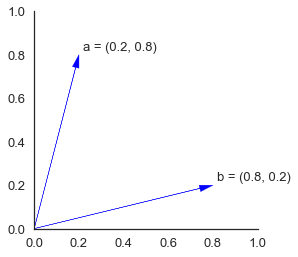

In [2]:
# Matplotlib code - just run this cell.
a = np.array([0.2, 0.8])
b = np.array([0.8, 0.2])
print "a = ", a
print "b = ", b

ax = plt.figure(figsize=(4,4)).gca()
for p,t in zip([a,b], ["a", "b"]):
    plot_arrow(ax, p, "%s = (%g, %g)" % (t, p[0], p[1]))
sns.despine()  # clean up plot axes
ax.set_xlim(0,1); ax.set_ylim(0,1); plt.show()

Vectors can be added together, or multiplied by scalars, and these operate on the coordinates element-wise. Given:

$$ 
\mathbf{a} = \begin{pmatrix} a_0 \\ a_1 \\ \ldots \\ a_n \end{pmatrix}
\quad \text{and} \quad 
\mathbf{b} = \begin{pmatrix} b_0 \\ b_1 \\ \ldots \\ b_n \end{pmatrix} 
$$

We have:

$$ 
\alpha\cdot\mathbf{a} = \begin{pmatrix} \alpha\cdot a_0 \\ \alpha\cdot a_1 \\ \ldots \\ \alpha\cdot a_n \end{pmatrix}
\quad \text{and} \quad
\mathbf{a} + \mathbf{b} = \begin{pmatrix} a_0 + b_0 \\ a_1 + b_1 \\ \ldots \\ a_n + b_n \end{pmatrix} 
$$

Note that the result of these operations is another vector of the same dimension; hence we refer to the space $ \mathbb{R}^n $ as a _vector space_.

Here's what these look like in $ \mathbb{R}^2 $:

a      =  [ 0.2  0.8]
b      =  [ 0.8  0.2]
1.25 a =  [ 0.25  1.  ]
a + b  =  [ 1.  1.]


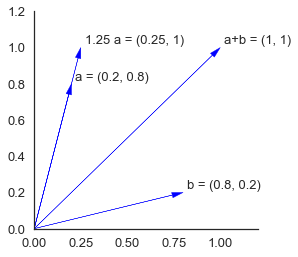

In [3]:
a = np.array([0.2, 0.8])
b = np.array([0.8, 0.2])
print "a      = ", a
print "b      = ", b
print "1.25 a = ", 1.25 * a
print "a + b  = ", a + b

ax = plt.figure(figsize=(4,4)).gca()
for p,t in zip([a,b,1.25*a, a+b], ["a", "b", "1.25 a", "a+b"]):
    plot_arrow(ax, p, "%s = (%g, %g)" % (t, p[0], p[1]))
sns.despine()  # clean up plot axes
ax.set_xlim(0,1.2); ax.set_ylim(0,1.2); plt.show()

### Dot Products

The dot product, also known as the **inner product**, is a way of multiplying two vectors (of the same dimension) to get a scalar. For $a, b \in \mathbb{R}^n$, we have:

$$ \mathbf{a}^T \mathbf{b} = \sum_{i=1}^n a_i b_i \in \mathbb{R} $$

There are a number of different ways to write this, such as $\mathbf{a} \cdot \mathbf{b}$ or $\langle \mathbf{a}, \mathbf{b} \rangle$, but they all mean the same thing.

The dot product has a few useful properties:

- Positive semidefinite: $ \mathbf{a}^T \mathbf{a} \ge 0 $ (and $ > 0$ if $\mathbf{a} \ne 0 $)
- Symmetric: $ \mathbf{a}^T \mathbf{b} = \mathbf{b}^T \mathbf{a} $
- Linear in each argument (bilinear): $ (\alpha\ \mathbf{a})^T \mathbf{b} = \alpha\  (\mathbf{a}^T \mathbf{b}) $ and $ (\mathbf{a} + \mathbf{b})^T \mathbf{c} = \mathbf{a}^T \mathbf{c} + \mathbf{b}^T \mathbf{c} $

Intuitively, the dot product tells us how much two vectors overlap. If the dot product $\mathbf{a}^T \mathbf{b} = 0$, then $\mathbf{a}$ and $\mathbf{b}$ are said to be **orthogonal**. (In two dimensions, this corresponds to the vectors being perpendicular.)

In [4]:
a = np.array([0.2, 0.8]); print "a      = ", a
b = np.array([0.8, 0.2]); print "b      = ", b
print "<a, b> =  %.03f" % np.dot(a,b)
print ""
c = np.array([-0.8, 0.2]); print "c      = ", c
print "<a, c> =  %.03f" % np.dot(a,c)

a      =  [ 0.2  0.8]
b      =  [ 0.8  0.2]
<a, b> =  0.320

c      =  [-0.8  0.2]
<a, c> =  0.000


### Vector Norms and Distance

A natural thing to ask about is the length of a vector, also known as the _norm_. The most common way to measure this is the squared, or Euclidean norm, also known as the L2 norm:

$$ ||\mathbf{v}||_2^2 = \mathbf{v}^T \mathbf{v} = \sum_{i=1}^n v_i^2 $$

This is the familiar Pythagorean theorem, and the L2 norm of a vector can be seen as the length of the line from the origin to that point.

A common way to use the norm is as a _distance metric_, whereby we take the norm of the difference vector $a-b$:

$$ d(\mathbf{a}, \mathbf{b}) = ||\mathbf{a} - \mathbf{b}||_2 = \sqrt{\sum_{i=1}^n (a_i - b_i)^2} $$

This corresponds to the length of a line between the two points.

In [5]:
a = np.array([0.2, 0.8])
b = np.array([0.8, 0.2])
print "a     = ", a, "  ||a||_2 = %.03f" % np.linalg.norm(a)
print "b     = ", b, "  ||b||_2 = %.03f" % np.linalg.norm(b)
print "a - b = ", a - b, "   d(a,b) = %.03f" % np.linalg.norm(a-b)

a     =  [ 0.2  0.8]   ||a||_2 = 0.825
b     =  [ 0.8  0.2]   ||b||_2 = 0.825
a - b =  [-0.6  0.6]    d(a,b) = 0.849


### Alternative Distance Functions

While the standard L2 distance is most common, we'll also encounter a few alternative ways of computing the distance between two vectors (points).

### Cosine Distance

We can re-arrange the equation for the L2 distance as:

$$\begin{eqnarray}
||\mathbf{a} - \mathbf{b}||_2^2 = (\mathbf{a} - \mathbf{b})^T (\mathbf{a} - \mathbf{b}) & = & \mathbf{a}^T \mathbf{a} + \mathbf{b}^T \mathbf{b} - 2 \mathbf{a}^T \mathbf{b} \\
& = & ||\mathbf{a}||_2^2 + ||\mathbf{b}||_2^2 - 2 \langle \mathbf{a}, \mathbf{b} \rangle
\end{eqnarray}
$$

Note the contribution of the norms $||\mathbf{a}||_2^2$ and $||\mathbf{b}||_2^2$ - L2 distance is very sensitive to the length of each vector. In many applications, it can be useful to ignore the length and measure only how much the two vectors point in the same direction.

The easiest way to do this is to **normalize** the vectors, then compute Euclidean distance:

$$ 
\mathbf{\bar{a}} = \frac{\mathbf{a}}{||\mathbf{a}||_2}
\quad \text{and} \quad
\mathbf{\bar{b}} = \frac{\mathbf{b}}{||\mathbf{b}||_2}
$$

$$ \begin{eqnarray}
2\ d(\mathbf{a}, \mathbf{b})_{\text{cos}} = ||\mathbf{\bar{a}} - \mathbf{\bar{b}}||_2^2 =  ||\mathbf{\bar{a}}||_2^2 + ||\mathbf{\bar{b}}||_2^2 - 2 \langle \mathbf{\bar{a}}, \mathbf{\bar{b}} \rangle = 2 - 2 \frac{\langle \mathbf{a}, \mathbf{b} \rangle}{||\mathbf{a}||_2 ||\mathbf{b}||_2}
\end{eqnarray} $$

And so we can write more succinctly:

$$ d(\mathbf{a}, \mathbf{b})_{\text{cos}} = 1 - \frac{\langle \mathbf{a}, \mathbf{b} \rangle}{||\mathbf{a}||_2\ ||\mathbf{b}||_2} = 1 - \cos \theta_{ab}$$

The name **cosine distance** comes from the fact that we can identify the second term as $ \cos \theta$, where $\theta$ is the angle between the two vectors $\mathbf{a}$ and $\mathbf{b}$.

a  =  [ 0.3  1.2]
a_bar =  [ 0.24253563  0.9701425 ]
b  =  [ 0.8  0.2]
b_bar  =  [ 0.9701425   0.24253563]


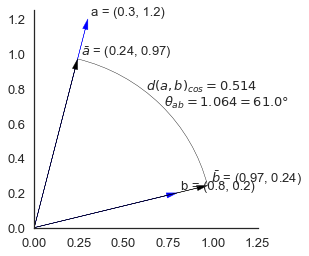

In [6]:
a = np.array([0.3, 1.2]);      print "a  = ", a
a_bar = a / np.linalg.norm(a); print "a_bar = ", a_bar
b = np.array([0.8, 0.2]);      print "b  = ", b
b_bar = b / np.linalg.norm(b); print "b_bar  = ", b_bar
d_cos = 0.5*np.linalg.norm(a_bar - b_bar)
theta_ab = np.arccos(1-d_cos)

ax = plt.figure(figsize=(4,4)).gca()

for p,t in zip([a,b], ["a", "b"]):
    plot_arrow(ax, p, "%s = (%g, %g)" % (t, p[0], p[1]))
for p,t in zip([a_bar, b_bar], [r"$\bar{a}$", r"$\bar{b}$"]):
    plot_arrow(ax, p, "%s = (%.02f, %.02f)" % (t, p[0], p[1]), color='k')
# Draw arc
ax.add_patch(mpatches.Arc([0,0], 2, 2, 
                          theta2=(180/np.pi)*np.arctan(a[1]/a[0]),
                          theta1=(180/np.pi)*np.arctan(b[1]/b[0])))
ax.text(1.1*(a[0]+b[0])/2.0+0.02, 1.1*(a[1]+b[1])/2.0+0.02, 
        "$d(a,b)_{cos} = %.3f$" % d_cos, 
        fontsize="small")
ax.text(1.1*(a[0]+b[0])/2.0+0.12, 1.1*(a[1]+b[1])/2.0-0.07, 
        ur"$\theta_{ab} = %.3f = %.1f °$" % (theta_ab, 180/np.pi*theta_ab), 
        fontsize="small")
    
sns.despine()  # clean up plot axes
ax.set_xlim(0,1.25); ax.set_ylim(0,1.25); plt.show()

Note that it's very common - although not strictly accurate - to refer to the second term:

$$ \frac{\langle \mathbf{a}, \mathbf{b} \rangle}{||\mathbf{a}||_2\ ||\mathbf{b}||_2} = \cos \theta_{ab} $$

as the cosine distance. Properly, this should be called the **cosine similarity**, since it is equal to 1 for identical (or colinear) vectors and decreases with increasing angle.

### L1 Distance

The L1 norm simply replaces the squares in the L2 norm with absolute value:

$$ ||\mathbf{v}||_1 = \sum_{i=1}^n |v_i| $$
and
$$ d(\mathbf{a}, \mathbf{b})_1 = ||\mathbf{a} - \mathbf{b}||_1 = \sum_{i=1}^n |a_i - b_i| $$

If Euclidean (L2) distance is the length of the a straight line between two points, L1 distance is the length of a shortest path on a grid - hence the common name **Manhattan distance**.

a      =  [ 0.2  0.8]
b      =  [ 0.8  0.2]


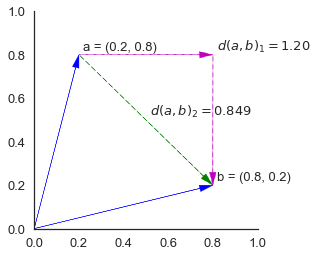

In [7]:
# Matplotlib code, just run this cell
a = np.array([0.2, 0.8])
b = np.array([0.8, 0.2])
print "a      = ", a
print "b      = ", b

ax = plt.figure(figsize=(4,4)).gca()
for p,t in zip([a,b], ["a", "b"]):
    plot_arrow(ax, p, "%s = (%g, %g)" % (t, p[0], p[1]))
# L2 shortest path
ax.arrow(a[0],a[1],b[0]-a[0],b[1]-a[1], ls="dashed", **arrow_fmt('g'))
ax.text((a[0]+b[0])/2.0+0.02, (a[1]+b[1])/2.0+0.02, 
        "$d(a,b)_2 = %.3f$" % np.linalg.norm(a-b), fontsize="small")
# L1 shortest path
ax.arrow(a[0],a[1],b[0]-a[0],0, ls="dashed", **arrow_fmt('m'))
ax.arrow(b[0],a[1],0,b[1]-a[1], ls="dashed", **arrow_fmt('m'))
ax.text(max([a[0],b[0]])+0.02, max([a[1],b[1]])+0.02, 
        "$d(a,b)_1 = %.2f$" % np.linalg.norm(a-b, ord=1), fontsize="small")
sns.despine()  # clean up plot axes
ax.set_xlim(0,1.0); ax.set_ylim(0,1.0); plt.show()

## Matricies and Linear Operators

We'll often want to work with more than one vector space (of the same or different dimension), and so we'll need to work with functions that map from one vector space to another: $ f : \mathbb{R}^n \to \mathbb{R}^m $. To start, we'll focus on **linear** functions, which obey the following equations:

$$ f(\alpha\ \mathbf{v}) = \alpha\ f(\mathbf{v})
\quad \text{and} \quad
f(\mathbf{a} + \mathbf{b}) = f(\mathbf{a}) + f(\mathbf{b}) $$

Note that we've already seen one example of such a function: for a fixed vector $\mathbf{a}$, the inner product $f(\mathbf{v}) = \langle \mathbf{a}, \mathbf{v} \rangle$ is a linear map $f : \mathbb{R}^n \to \mathbb{R} $.

If we want to map into a space of dimension $m > 1$, we could construct such a function $f : \mathbb{R}^n \to \mathbb{R}^m $ by taking a collection of $m$ such vectors $\mathbf{a}_1, \mathbf{a}_2, \ldots, \mathbf{a}_m \in \mathbb{R}^n $ and taking the inner product with each, and concatenating the results into a vector $x \in \mathbb{R}^m$:

$$ x = f(\mathbf{v}) = \begin{pmatrix}
x_1 \\ x_2 \\ \vdots \\ x_m
\end{pmatrix} = \begin{pmatrix} 
\langle \mathbf{a_1}, \mathbf{v} \rangle \\
\langle \mathbf{a_2}, \mathbf{v} \rangle \\
\vdots \\
\langle \mathbf{a_m}, \mathbf{v} \rangle
\end{pmatrix}$$

Since each element is a linear function of $\mathbf{v}$ and vector addition and scalar multiplication act element-wise, our whole function $f : \mathbb{R}^n \to \mathbb{R}^m $ is also linear.

If we take our collection of $m$ vectors of dimension $n$ and stack them horizontally, we can write them as a **matrix** $A \in \mathbb{R}^{m \times n}$:

$$ A = \begin{pmatrix}
\mathbf{a_1} \\ \mathbf{a_2} \\ \vdots \\ \mathbf{a_m}
\end{pmatrix} = \begin{pmatrix}
a_{11} & a_{12} & \ldots & a_{1n} \\
a_{21} & a_{22} & \ldots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \ldots & a_{mn}
\end{pmatrix} $$

Now we can express our function $f(\mathbf{v})$ as a **matrix-vector product**:

$$ \mathbf{x} = f(\mathbf{v}) = A \mathbf{v} = \begin{pmatrix}
x_1 \\ x_2 \\ \vdots \\ x_m
\end{pmatrix} = \begin{pmatrix}
a_{11} & a_{12} & \ldots & a_{1n} \\
a_{21} & a_{22} & \ldots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \ldots & a_{mn}
\end{pmatrix} \begin{pmatrix}
v_1 \\ v_2 \\ \vdots \\ v_n \\
\end{pmatrix} $$

Where, by identification with our dot products above, we can write a direct expression for the elements of $\mathbf{x}$:

$$ x_i = \langle \mathbf{a_i}, \mathbf{v} \rangle = \sum_{j=1}^n a_{ij} v_j 
\quad \text{for}\ \ i = 1,\ldots,m $$

In fact, _any_ linear function $ f : \mathbb{R}^n \to \mathbb{R}^m $ can be written as such a matrix, so our definition above is completely sufficient. We leave the verification of this fact to the reader.

What does this function do, intuitively? There are many different, equivalent views, but two particular useful pictures are:

### As Dot Products

We can think of the vectors $\mathbf{a_i}$ (the rows of the matrix) as "exemplars" of sorts, and the matrix-vector product as independently measuring overlap (similarity) with each one. Then the resulting vector $\mathbf{x} \in \mathbb{R}^m $ is a "fingerprint" of sorts for how our test vector $\mathbf{v}$ relates to the exemplars.

In machine learning, it's common to have the rows $\mathbf{a_i}$ correspond to particular target classes. For example, in an image classifier, you might have $\mathbf{a_4}$ be the weights for class "cow", and then $x_4 = \langle \mathbf{a_4}, \mathbf{v} \rangle$ corresponds to a score for how much the image looks like a cow. In deep learning, these exemplars might be the weight vectors for hidden "neurons" inside the model, and the dot product measures how strongly that neuron responds to an input vector $\mathbf{v}$.

A v = [ 0.44  0.71]


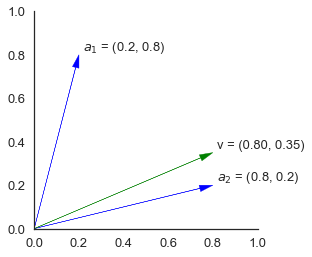

In [8]:
# Simple example of matrix-vector product. 
# Note that the vector v has more overlap with A_2 than with A_1
A = np.array([[0.2, 0.8],
              [0.8, 0.2]])
v = np.array([0.8, 0.35])
print "A v =", np.dot(A, v)

ax = plt.figure(figsize=(4,4)).gca()
for p,t in zip(A, [r"$a_1$", r"$a_2$"]):
    plot_arrow(ax, p, "%s = (%g, %g)" % (t, p[0], p[1]))
plot_arrow(ax, v, r"v = (%.2f, %.2f)" % (v[0],v[1]), color='g')
sns.despine()  # clean up plot axes
ax.set_xlim(0,1.0); ax.set_ylim(0,1.0); plt.show()

### As Geometric Transformation

Geometrically, a matrix (or any linear map) can be seen as (linearly) transforming one volume of space into another, through a combination of **rotation and stretching**. In two dimensions ($f : \mathbb{R}^2 \to \mathbb{R}^2$), we can visualize this easily as transforming a square $V$ into a parallelogram:

A = 
[[ 0.2  0.8]
 [ 0.8  0.2]]
B = 
[[ 0.64671567 -0.2678784 ]
 [ 0.57402515  1.3858193 ]]


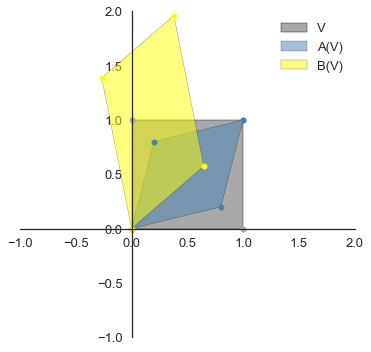

In [9]:
ax = plt.figure(figsize=(6,6)).gca()

# The sample matrix from the previous cell
A = np.array([[0.2, 0.8],
              [0.8, 0.2]])
print "A = \n", A

# Construct another matrix
theta = np.pi/8
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])
D = np.diag([0.7,1.5])
B = np.dot(D, R)
print "B = \n", B

corners = np.array([[0,0],[0,1],[1,1],[1,0]]).T  # Transpose to collection of column vectors
plot_polygon(ax, corners, label="V", color="DarkGrey", alpha=1.0)
plot_polygon(ax, np.dot(A, corners), label="A(V)", color="SteelBlue", alpha=0.5)
plot_polygon(ax, np.dot(B, corners), label="B(V)", color="Yellow", alpha=0.5)

ax.legend()
set_center_spines(ax); ax.set_xlim(-1,2); ax.set_ylim(-1,2); plt.show()

## Matrix Operations

Matricies can be added, subtracted, and multiplied by scalars just as vectors can, with all of these operations acting element-wise. For two matricies of the same shape $A,B \in \mathbf{R}^{m \times n}$ and $\lambda \in \mathbf{R}$:

$$ \begin{eqnarray}
(\lambda\ A)_{ij} & = & \lambda\ A_{ij} \\ 
(A + B)_{ij} & = & A_{ij} + B_{ij} \\
\end{eqnarray} $$

You can also take the **transpose** of a matrix, which interchanges the row and column indices $(A^T)_{ji} = A_{ij}$. Note that this changes the shape:

$$ 
A = \begin{pmatrix}
a_{11} & a_{12} & a_{13} & \ldots & a_{1n} \\
a_{21} & a_{22} & a_{23} & \ldots & a_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & a_{m3} & \ldots & a_{mn}
\end{pmatrix} \in \mathbb{R}^{m\times n}
\quad \quad
A^T = \begin{pmatrix}
a_{11} & a_{21} & \ldots & a_{m1} \\
a_{12} & a_{22} & \ldots & a_{m2} \\
a_{13} & a_{23} & \ldots & a_{m3} \\
\vdots & \vdots & \ddots & \vdots \\
a_{1n} & a_{2n} & \ldots & a_{mn}
\end{pmatrix} \in \mathbb{R}^{n\times m}
$$

If a matrix has the same number of rows and columns, we refer to it as a **square** matrix. If a square matrix $A$ is equal to its transpose $A^T$, then we say that $A$ is **symmetric**.

### Matrix Multiplication

Finally, matricies can be **multiplied** together, yielding a new matrix. 

This is only possible if the dimensions are compatible: the number of _columns_ (second dimension) of the first matrix must equal the number of _rows_ (first dimension) of the second. For $A \in \mathbb{R}^{m \times \ell}$ and $B \in \mathbb{R}^{\ell \times n}$, we can get a matrix $C = AB \in \mathbb{R}^{m \times n}$:

$$ C_{ij} = (AB)_{ij} = \sum_{k = 1}^{\ell} A_{ik} B_{kj} $$

Note how we sum over the inner dimension $k = 1, \ldots, \ell$. One way to understand this is to represent $A$ and $B$ as collections of vectors:

$$ 
A = \begin{pmatrix}
\mathbf{a_1} \\ \mathbf{a_2} \\ \vdots \\ \mathbf{a_m}
\end{pmatrix}
\quad \text{and} \quad
B = \begin{bmatrix}
\mathbf{b_1} & \mathbf{b_2} & \ldots & \mathbf{b_n}
\end{bmatrix}
$$
where both $\mathbf{a_i}, \mathbf{b_j} \in \mathbb{R}^\ell$ are the same length. Now our formula for $(AB)_{ij}$ reduces to the dot products between each row $\mathbf{a_i}$ of $A$ and column $\mathbf{b_j}$ of $B$:

$$ C_{ij} = (AB)_{ij} = \sum_{k = 1}^{\ell} A_{ik} B_{kj} = \langle \mathbf{a_i}, \mathbf{b_j} \rangle $$

From this perspective, we can view the matrix-vector product as a special case of matrix multiplication, where $B$ has only a single column $\mathbf{b_1} = \mathbf{v}$ and $(A\mathbf{v})_i = (AB)_{i1}$.

Another way to interpret matrix multiplication is as **function composition**. If the matrix $A \in \mathbb{R}^{n \times \ell}$ represents a function $f : \mathbb{R}^\ell \to \mathbb{R}^m$ and $B \in \mathbb{R}^{\ell \times n}$ represents a function $g : \mathbb{R}^n \to \mathbb{R}^\ell$, then we have for a "test vector" $\mathbf{v} \in \mathbf{R}^n$:

$$ (AB)\mathbf{v} = A(B\mathbf{v}) = (f\circ g)(\mathbf{v}) = f(g(v)) $$

So the action of the matrix $AB$ on a vector is the same as applying $B$, followed by $A$ (_i.e. matrix multiplication is associative_).

We can see this composition in the example below: the matrix $B$ squeezes the square into a rectangle, while the matrix $A$ rotates it by $\pi/8 = 22.5^{\circ}$ counter-clockwise.

Note that $AB \ne BA$ - matrix multiplication is, in general, **non-commutative**.

A = 
[[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]
B = 
[[ 0.7  0. ]
 [ 0.   1.5]]
AB = 
[[ 0.64671567 -0.57402515]
 [ 0.2678784   1.3858193 ]]


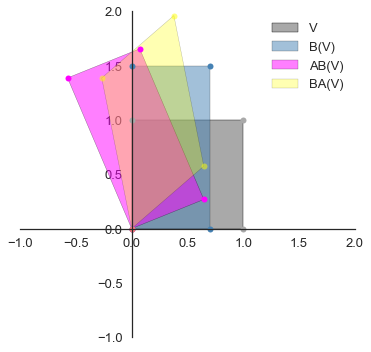

In [10]:
ax = plt.figure(figsize=(6,6)).gca()

# Construct a matrix by multiplying two together
theta = np.pi/8
A = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])
B = np.diag([0.7,1.5])
AB = np.dot(A, B)
BA = np.dot(B, A)
print "A = \n", A
print "B = \n", B
print "AB = \n", AB

corners = np.array([[0,0],[0,1],[1,1],[1,0]]).T  # Transpose to collection of column vectors

plot_polygon(ax, corners, label="V", color="DarkGrey", alpha=1.0)
plot_polygon(ax, np.dot(B, corners), label="B(V)", color="SteelBlue", alpha=0.5)
plot_polygon(ax, np.dot(AB, corners), label="AB(V)", color="Magenta", alpha=0.5)
plot_polygon(ax, np.dot(BA, corners), label="BA(V)", color="Yellow", alpha=0.3, dotalpha=0.5)

ax.legend()
set_center_spines(ax); ax.set_xlim(-1,2); ax.set_ylim(-1,2); plt.show()

## Special Matricies

There are a number of special classes of matricies, but we'll focus on three here: the **identity matrix**, **diagonal** matricies, and **orthonormal** matricies.

### The Identity Matrix

The identity matrix $I_n \in \mathbb{R}^{n \times n}$ is a special matrix that does nothing under matrix multiplication. For $A \in \mathbb{R}^{m \times n}$:

$$ I_m\ A = A = A\ I_n $$

It has ones along the diagonal, and zeros everywhere else:

$$ I_n = \begin{pmatrix}
1 & 0 & 0 & \ldots & 0 \\
0 & 1 & 0 & \ldots & 0 \\
0 & 0 & 1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & 1
\end{pmatrix} $$

Some - but not all - matricies ("invertible matricies") have a corresponding inverse $A^{-1}$, such that matrix multiplication with the inverse gives the identity matrix:

$$ A^{-1} A = I $$

_(Note that usually we require invertible matricies to be **square**, or $n \times n$, but it's possible to define a "pseudoinverse" for non-square matricies such that the above equation holds. In any case, we won't need to worry much about inverses in this class.)_

### Diagonal Matricies

A **diagonal** matrix is a matrix where only the diagonal elements are nonzero (i.e. $D_{ij} = 0$ if $i\ne j$):

$$ D = \begin{pmatrix}
d_1 & 0 & 0 & \ldots & 0 \\
0 & d_2 & 0 & \ldots & 0 \\
0 & 0 & d_3 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & d_n
\end{pmatrix} $$

Note that the action of a diagonal matrix on a vector is just element-wise multiplication. For $D \in \mathbf{R}^{n \times n}$:

$$ (D\mathbf{v})_i = d_i\ v_i $$

Geometrically, this corresponds to scaling (stretching or compressing) each dimension independently.

### Orthonormal Matricies

An **orthogonal** matrix is one where all the rows (or columns) are orthogonal to each other, i.e. the dot product between any non-identical pair is zero:

$$ Q = \begin{pmatrix}
\mathbf{q_1} \\ \mathbf{q_2} \\ \vdots \\ \mathbf{q_n}
\end{pmatrix} 
\quad \quad \text{where}\ 
\langle \mathbf{q_i}, \mathbf{q_j} \rangle = \begin{cases}
\ge 0 \quad \text{if}\ i = j \\
0\quad \text{otherwise}
\end{cases}
$$
Usually we'll deal with **orthonormal** matricies, which have the additional property that $\langle \mathbf{q_i}, \mathbf{q_i} \rangle = 1$ - i.e. the rows (or columns) have unit norm $||\mathbf{q_i}||_2^2 = 1$.

Geometrically, this corresponds to a combination of rotations and reflections along various axes.

These matricies have the useful property that the transpose $Q^T$ is also the inverse:

$$ Q^T Q = Q Q^T = I $$

_Exercise: check that $Q^TQ = I$ using the dot product definition of matrix multiplication._

orthonormal A = 
[[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]
diagonal B = 
[[ 0.7  0. ]
 [ 0.   1.5]]


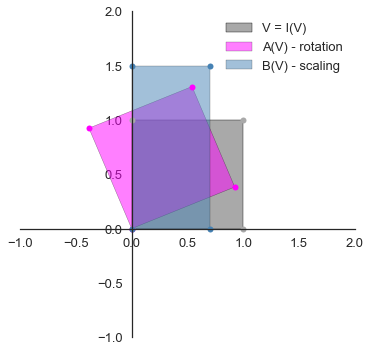

In [11]:
ax = plt.figure(figsize=(6,6)).gca()

# Construct an orthonormal rotation matrix
theta = np.pi/8
A = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])
# Construct a diagonal matrix
B = np.diag([0.7,1.5])
print "orthonormal A = \n", A
print "diagonal B = \n", B

corners = np.array([[0,0],[0,1],[1,1],[1,0]]).T  # Transpose to collection of column vectors

plot_polygon(ax, corners, label="V = I(V)", color="DarkGrey", alpha=1.0)
plot_polygon(ax, np.dot(A, corners), label="A(V) - rotation", color="Magenta", alpha=0.5)
plot_polygon(ax, np.dot(B, corners), label="B(V) - scaling", color="SteelBlue", alpha=0.5)

ax.legend()
set_center_spines(ax); ax.set_xlim(-1,2); ax.set_ylim(-1,2); plt.show()

## Eigenvectors and the SVD

One surprising fact is that _any_ matrix - square or not, invertible or not - can be represented as the product (by matrix multiplication) of diagonal and orthonormal matricies:

$$ A = UDV^T $$

where $A \in \mathbb{R}^{m \times n}$ is any matrix, $U \in \mathbb{R}^{m \times m}$ and $V \in \mathbb{R}^{n \times n}$ are orthonormal, and $D \in \mathbb{R}^{m \times n}$ is diagonal.

This is known as the **Singular Value Decomposition**, or the **SVD**, and has numerous applications in machine learning and statistics, as well as in many other areas of science, engineering, and applied mathematics. We'll encounter it in NLP when computing word vectors, as we use the SVD directly and build on it as the basis for more sophisticated algorithms like word2vec and GloVe.

Here's an example on simple $2 \times 2$ matricies. Note how the blue square $V^T(S)$ is squeezed and stretched along the axes into the green parallelogram $DV^T(S)$:

A = 
[[ 0.27305963 -0.92489915]
 [ 0.8204782   1.06621552]]


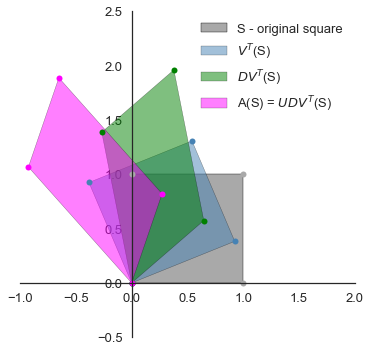

In [12]:
ax = plt.figure(figsize=(6,6)).gca()

# Construct an orthonormal rotation matrix
theta = np.pi/8
V = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]]).T
# Construct a diagonal matrix
D = np.diag([0.7,1.5])
# Construct another orthonormal rotation matrix, plus reflection
phi = np.pi/6
U = np.array([[np.cos(phi), -np.sin(phi)],
              [np.sin(phi), np.cos(phi)]])
# Re-construct the desired matrix A
A = np.dot(U, np.dot(D, V.T))
print "A = \n", A

corners = np.array([[0,0],[0,1],[1,1],[1,0]]).T  # Transpose to collection of column vectors

plot_polygon(ax, corners, label="S - original square", color="DarkGrey", alpha=1.0)
VTS = np.dot(V.T, corners)
plot_polygon(ax, VTS, label="$V^T$(S)", color="SteelBlue", alpha=0.5)
DVTS = np.dot(D, VTS)
plot_polygon(ax, DVTS, label="$DV^T$(S)", color="Green", alpha=0.5)
plot_polygon(ax, np.dot(A, corners), label="A(S) = $UDV^T$(S)", color="Magenta", alpha=0.5)

ax.legend(loc="upper right")
set_center_spines(ax); ax.set_xlim(-1,2); ax.set_ylim(-0.5,2.5); plt.show()

### What does it mean?

The elements $d_i$ for $i = 1,\ldots,\min(m,n)$ are known as the **singular values** of $A$, and traditionally we write them in descending order so that $d_1 > d_2 > \ldots $. The interpretation of these depends heavily on what the matrix $A$ represents, but generally we take the larger values to represent the major "components" of $A$.

The _columns_ of $U$ and $V$ are known as the left- and right- **singular vectors** of $A$, and represent the directions along which the matrix acts. 

In the special case of a **symmetric matrix** we have that $U = V$ (and we'll often just call it $Q$) and the left- and right- singular vectors are the same, and in this case we refer to these vectors as **eigenvectors** and the singular values as **eigenvalues**. Each eigenvector $\mathbf{q_i}$ has an associated eigenvalue $d_i = \lambda_i$, and the following equation holds:

$$ A \mathbf{q_i} = \lambda_i \mathbf{q_i} $$

That is, the matrix $A$ simply scales each eigenvector $\mathbf{q_i}$ by the associated (scalar) eigenvalue.

A = 
[[ 0.8  0.2]
 [ 0.2  0.8]]


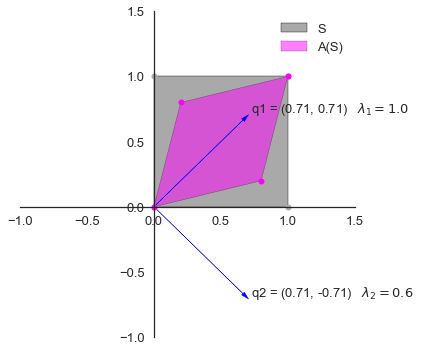

In [13]:
ax = plt.figure(figsize=(6,6)).gca()

A = np.array([[0.8, 0.2],
              [0.2, 0.8]])
print "A = \n", A

corners = np.array([[0,0],[0,1],[1,1],[1,0]]).T  # Transpose to collection of column vectors

plot_polygon(ax, corners, label="S", color="DarkGrey", alpha=1.0)
AS = np.dot(A, corners)
plot_polygon(ax, AS, label="A(S)", color="Magenta", alpha=0.5)

q1 = [1,1]/np.sqrt(2)
q2 = [1, -1]/np.sqrt(2)
plot_arrow(ax, q1, "q1 = (%.02f, %.02f)   $\lambda_1 = 1.0$" % (q1[0], q1[1]))
plot_arrow(ax, q2, "q2 = (%.02f, %.02f)   $\lambda_2 = 0.6$" % (q2[0], q2[1]))

ax.legend(loc="upper right")
set_center_spines(ax); ax.set_xlim(-1,1.5); ax.set_ylim(-1,1.5); plt.show()

### Rows of $U$ and $V$

Conversely, if we look at the _rows_ of $U$ and $V$, we get the _response_ of the matrix $A$ to each element (direction) in space ($\mathbb{R}^m$ on the left and $\mathbb{R}^n$ on the right). Suppose we start with a test vector $\mathbf{\hat{e}_i} \in \mathbb{R}^n$ where

$$\left(\mathbf{\hat{e}_i}\right)_j = \begin{cases}
1 \quad \text{if}\ i = j \\
0 \quad \text{otherwise}
\end{cases}$$

Then $V^T\mathbf{\hat{e}_i} = \mathbf{v_i}$: the $i^{th}$ axis gets rotated (and/or reflected) to the vector $v_j$ (a right-eigenvector of $A$). Then the diagonal matrix $D$ scales each element of $\mathbf{v_i}$, and we again rotate the resulting vector $D \mathbf{v_i}$ by the matrix $U$.

Why is this useful? In NLP, we'll often find ourselves dealing with "one-hot vectors" that look like the test vectors $\mathbf{\hat{e}_i}$, often with each $i$ representing a particular word. Then the rows of $U$ or $V$ can be used as **representations** (or "**embeddings**") of these words into a more interesting vector space. Later in the course, we'll explore the properties of these embedding spaces, and build on them to construct neural network models for language.

## Tensors

So far, we've seen vectors - collections of numbers $v \in \mathbb{R}^n$ with one index $v_i$, and matricies - collections of numbers $A \in \mathbb{R}^{m \times n}$ with two indices $A_{ij}$. What about objects with three indices, or more?

These objects are known as Tensors (hence the name "TensorFlow"), and there's a simple way to construct them from what we know about vectors and matricies.

Recall that by using the inner product, we could treat a vector $\mathbf{v} \in \mathbb{R}^n$ as a linear map from the space of vectors to the real numbers: 
$$
f_{\mathbf{v}} : \mathbb{R}^n \to \mathbb{R}
\quad \text{where} \quad 
f_{\mathbf{v}}(\mathbf{x}) = \mathbf{v}^T \mathbf{x} = \sum_{i=1}^n v_i x_i
$$

Similarly, we can view a matrix $A \in \mathbb{R}^{m \times n}$ as a _bilinear_ map that takes two vectors and gives us a real number: 
$$
g_{A} : \mathbb{R}^m \times \mathbb{R}^n \to \mathbb{R} 
\quad \text{where} \quad 
g_{A}(\mathbf{x}, \mathbf{y}) = \mathbf{x}^T A \mathbf{y} = \sum_{i=1}^m \sum_{j=1}^n x_i A_{ij} y_j
$$

If we want to operate on three vectors, we can just add a third index, giving a rank-3 (or 3rd-order) tensor:
$$
h_{T} : \mathbb{R}^m \times \mathbb{R}^n \times \mathbb{R}^\ell \to \mathbb{R}
\quad \text{where} \quad 
h_{T}(\mathbf{x}, \mathbf{y}, \mathbf{z}) = \sum_{i=1}^m \sum_{j=1}^n \sum_{k=1}^\ell T_{ijk} x_i y_j z_k
$$
_**Note:** It's a little trickier to write down tensor equations, because we can't just rely on "right" and "left" as with matricies. There are conventions that can help, but we won't be writing so many tensor equations that we'll need them in this class._

Now by analogy to matrix-vector products, where we just applied the matrix to a single vector (not two), we can also use the rank-3 tensor as a linear map that takes two vectors and gives us a third:

$$
\tau_{T} : \mathbb{R}^m \times \mathbb{R}^n \to \mathbb{R}^\ell
\quad \text{where} \quad 
\left(\mathbf{x}\mathbf{T}\mathbf{y}\right)_k = \left[\tau_{T}(\mathbf{x}, \mathbf{y})\right]_k = \sum_{i=1}^m \sum_{j=1}^n x_i T_{ijk} y_j
$$

Similar to how we could think of a matrix $A$ as a collection of vectors $\mathbf{a_i}$ that we applied to the input, we can think of such a tensor $T$ as a collection of matricies $\mathbf{T_k}$ that we apply to produce each element of the the output.

Tensors of this type have found a number of applications in NLP, for example in [Socher et al. 2013](https://nlp.stanford.edu/~socherr/EMNLP2013_RNTN.pdf).